<a href="https://colab.research.google.com/github/jshmauve/Integration-by-parts/blob/main/2320_%EC%A1%B0%EC%84%B1%ED%9C%98_%EB%B6%80%EC%A0%95%EC%A0%81%EB%B6%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sympy import * # 수학 관련 라이브러리 호출

init_printing() # 출력값이 수식처럼 보이도록 설정

x = symbols('x') # x를 적분변수, 미분변수로 인식하도록 함
U, u, V, v ,UV = symbols('U, u, V, v, UV', cls = Function) # U, u, V, v, UV를 함수로 인식하도록 함, u는 U의 도함수, V는 v의 원시함수 
n, m, A, B = symbols('n, m, A, B', constant = True, zero = False) # n, m, A, B를 상수로 인식하도록 함, 0인 경우 제외
integr1, integr2 = symbols('integr1, integr2', cls = Function) # 뒤에서 사용할 integr1, integr2를 함수로 인식하도록 함

def Integration_by_parts(U, v, x, loop): # 부분 적분 함수 Integration_by_parts 만듬, 변수는 순서대로 미분할 함수, 적분할 함수, 적분 변수, 몇 번 부분 적분 할지
    if loop == 0:  # 남은 부분 적분 횟수가 0이 된 경우 
      t = "Integration_by_parts("+str(U)+","+str(v)+","+str(x)+")" # 부분 적분 진행을 끝내고 인테그랄 형태로 반환
      return t
    else:
      u=diff(U, x) # diff는 미분에 대한 함수, 변수는 순서대로 원함수, 미분 변수
      V=integrate(v, x) # integrate는 적분에 대한 함수, 변수는 순서대로 피적분 함수, 적분 변수
      UV=U*V # UV라는 함수를 함수 U와 V의 곱으로 지정
      t = str(UV)+"+"+str(Integration_by_parts(-u,V,x, loop-1)) 
# UV-인테그랄(uVdx)가 원래 형태이지만, -를 인테그랄 앞에 문자 형태로 붙이는 경우 다음 적분 시 기호로 인식이 안 되서 적용이 안 됨
# 이를 해결하기 위해 인테그랄 앞을 +로 하고 새로운 미분할 함수를 u 대신 -u로 쓰는 것으로 형태를 바꿈, loop-1은 부분 적분 진행 횟수를 1회 차감한 것
      return t # 문자열 형태로 저장된 식을 반환함

In [ ]:
print(Integration_by_parts(sin(n*x),exp(m*x),x,2)) # expmx sinnx를 2회 부분 적분한 결과를 출력

exp(m*x)*sin(n*x)/m+-n*exp(m*x)*cos(n*x)/m**2+Integration_by_parts(-n**2*sin(n*x),exp(m*x)/m**2,x)


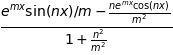

In [ ]:
(exp(m*x)*sin(n*x)/m-n*exp(m*x)*cos(n*x)/m**2)/(1+n**2/m**2) # 인테그랄 앞 부분을 복사하여 그대로 넣고, 인테그랄 앞에 붙는 계수에 1을 더해 나눠줌

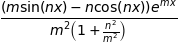

In [ ]:
simplify(exp(m*x)*sin(n*x)/m-n*exp(m*x)*cos(n*x)/m**2)/(1+n**2/m**2) # 식을 간단하게 만들어주는 함수 적용

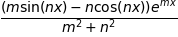

In [ ]:
simplify(integrate(exp(m*x)*sin(n*x),x)) # 사실 그냥 적분을 시켜도 결과값이 잘 출력이 됨. 부분 적분 함수를 만들어서 얻은 결과가 맞는지 확인, 결과가 잘 나오는 것을 볼 수 있음

In [ ]:
print(Integration_by_parts(cos(n*x),exp(m*x),x,2)) # expmx cosnx에 대해서도 같은 과정을 진행

exp(m*x)*cos(n*x)/m+n*exp(m*x)*sin(n*x)/m**2+Integration_by_parts(-n**2*cos(n*x),exp(m*x)/m**2,x)


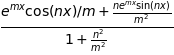

In [ ]:
(exp(m*x)*cos(n*x)/m+n*exp(m*x)*sin(n*x)/m**2)/(1+n**2/m**2)

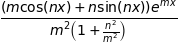

In [ ]:
simplify(exp(m*x)*cos(n*x)/m+n*exp(m*x)*sin(n*x)/m**2)/(1+n**2/m**2)

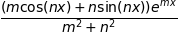

In [ ]:
simplify(integrate(exp(m*x)*cos(n*x),x)) # 결과가 잘 나온 것을 확인할 수 있음

In [ ]:
print(Integration_by_parts((sin((A+B)*x))/2,exp(m*x),x,2))
print(Integration_by_parts((cos((A-B)*x))/2,exp(m*x),x,2)) # sinAxcosBx = (sin(A+B)x+sin(A-B)x)/2 임을 이용하여 분리하여 따로 따로 적분함

exp(m*x)*sin(x*(A + B))/(2*m)+-(A + B)*exp(m*x)*cos(x*(A + B))/(2*m**2)+Integration_by_parts((-A/2 - B/2)*(A + B)*sin(x*(A + B)),exp(m*x)/m**2,x)
exp(m*x)*cos(x*(A - B))/(2*m)+(A - B)*exp(m*x)*sin(x*(A - B))/(2*m**2)+Integration_by_parts(-(A/2 - B/2)*(A - B)*cos(x*(A - B)),exp(m*x)/m**2,x)


In [ ]:
integr1 = (exp(m*x)*sin(x*(A + B))/(2*m)-(A + B)*exp(m*x)*cos(x*(A + B))/(2*m**2))/(1-(-A - B)*(A + B)/m**2) # 앞의 것을 적분한 함수를 integr1이라 지정

In [ ]:
integr2 = (exp(m*x)*cos(x*(A - B))/(2*m)+(A - B)*exp(m*x)*sin(x*(A - B))/(2*m**2))/(1+(A - B)*(A - B)/m**2) # 뒤의 것을 적분한 함수를 integr2이라 지정

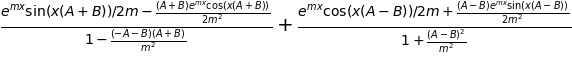

In [ ]:
integr1 + integr2 # 두 함수를 더함

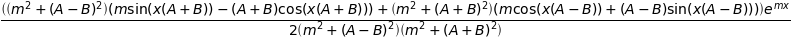

In [ ]:
simplify(integr1 + integr2) # 식을 정리하는 함수 실행

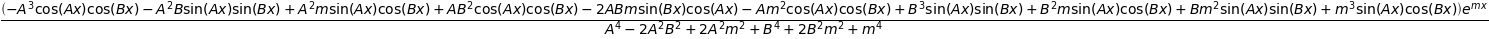

In [ ]:
simplify(integrate(sin(A*x)*cos(B*x)*exp(m*x), x)) # 그런데 위의 식과 다른 형태의 식이 나옴

In [ ]:
import random as r # 랜덤함수로 A, B, m, x에 임의의 값을 대입해서 정수부분만 끊어서 실제 답과 같은지 비교하는 코드를 작성
for i in range(20):
  A,B,m = (pi*r.randint(1,4))/4, (pi*r.randint(1,4))/4, r.randint(1,5)
  for x in range(2):
    integr1 = (exp(m*x)*sin(x*(A + B))/(2*m)-(A + B)*exp(m*x)*cos(x*(A + B))/(2*m**2))/(1-(-A - B)*(A + B)/m**2)
    integr2 = (exp(m*x)*cos(x*(A - B))/(2*m)+(A - B)*exp(m*x)*sin(x*(A - B))/(2*m**2))/(1+(A - B)*(A - B)/m**2)
    integr_from_code = integr1 + integr2
    integr_answer =(-A**3*cos(A*x)*cos(B*x) - A**2*B*sin(A*x)*sin(B*x) + A**2*m*sin(A*x)*cos(B*x) + A*B**2*cos(A*x)*cos(B*x) - 2*A*B*m*sin(B*x)*cos(A*x) - A*m**2*cos(A*x)*cos(B*x) + B**3*sin(A*x)*sin(B*x) + B**2*m*sin(A*x)*cos(B*x) + B*m**2*sin(A*x)*sin(B*x) + m**3*sin(A*x)*cos(B*x))*exp(m*x)/(A**4 - 2*A**2*B**2 + 2*A**2*m**2 + B**4 + 2*B**2*m**2 + m**4)
    if int(integr_from_code) != int(integr_answer):
      print("False",int(simplify(integr_from_code)), int(simplify(integr_answer))) 
    else:
      print("True") 
# sin, cos, exp 함수가 정수값 단위로 끊어지기 때문에 오차가 생기는 경우가 많지만 정답률이 괜찮은 편
# 실제로 손으로 계산 했을 때 위에서 코드로 구한 값이 나옴

True
False 1 -18
True
False 1 0
True
False -3 -21
True
False 1 0
True
True
True
False 3 1
True
False 5 -3
True
False 3 -2
True
False 1 0
True
False 5 -3
True
False 5 1
True
False 1 -18
True
False 1 0
True
False 1 0
True
False 0 -2
True
False 1 -1
True
False 3 -3
True
True
True
False 1 0
True
False 5 -3
